In [7]:
import numpy as np
import matplotlib.pyplot as plt
%run zadanie1_neuron.ipynb

## Bramka AND

W tym zadaniu należy nauczyć neuron wyliczać bramkę logiczną AND. 

## AND gate

In this task, teach the neuron to calculate the AND logic gate.

In [2]:
def Neuron_AND(neuron, learning_rate, steps):
    ### BEGIN SOLUTION
    for i in range(steps):
        in0 = int(np.random.uniform(0, 2))
        in1 = int(np.random.uniform(0, 2))
        out = neuron.forward(np.array((in0, in1)))
        error = (in0 * in1) - out # AND
        #error=(in0 + in1 - in0 * in1) - out #OR
        #error=(in0 + in1)%2 - out #XOR
        neuron.backward(error)
        neuron.learn(learning_rate)
    ### END SOLUTION
   

In [3]:
neuron_AND = Neuron(2)
Neuron_AND(neuron_AND, 0.1, 100000)

print('weights :', neuron_AND.weights)
print('bias :', neuron_AND.bias)
print(neuron_AND.forward(np.array((0 ,0))))
print(neuron_AND.forward(np.array((1, 0))))
print(neuron_AND.forward(np.array((0.5, 0.5))))
print(neuron_AND.forward(np.array((1, 1))))

weights : [6.52344229 6.5194945 ]
bias : -9.868621521476273
5.177136844753596e-05
0.034053381549809754
0.03398851240094732
0.9598561918791215


### Poniżej możemy zwizualizować obszary decyzyjne dla tak nauczonego neuronu.

### Below we can visualize the decision areas for such a learned neuron.

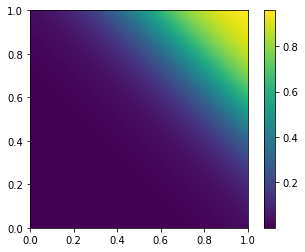

In [4]:
size = 100
tmp = np.zeros((size,size))
for i in range(size):
    for j in range(size):
        tmp[i][j] = neuron_AND.forward(np.array((1-i / float(size), j / float(size))))
plt.imshow(tmp,extent=[0, 1, 0, 1])
plt.colorbar()
plt.show()

In [5]:
np.testing.assert_equal(neuron_AND.forward(np.array((0, 0))) < 0.05, True)
np.testing.assert_equal(neuron_AND.forward(np.array((1, 0))) < 0.05, True)
np.testing.assert_equal(neuron_AND.forward(np.array((0.5, 0.5))) < 0.05, True)
np.testing.assert_equal(neuron_AND.forward(np.array((1, 1))) > 0.95, True)